In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import tqdm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

%matplotlib inline

# Electoral division travel data

In [2]:
ed_travel_df = pd.read_csv("../data/processed/ed_travel_data.csv")

In [3]:
no_commuters = ed_travel_df['No. of Commuters'].to_numpy()
pop_ratio = ed_travel_df['pop_ratio'].to_numpy()
dist = ed_travel_df['Distance'].to_numpy()

dist = np.repeat(dist, no_commuters)
log_dist = np.log10(dist)
pop_ratio = np.repeat(pop_ratio, no_commuters)
log_pop_ratio = np.log10(pop_ratio)

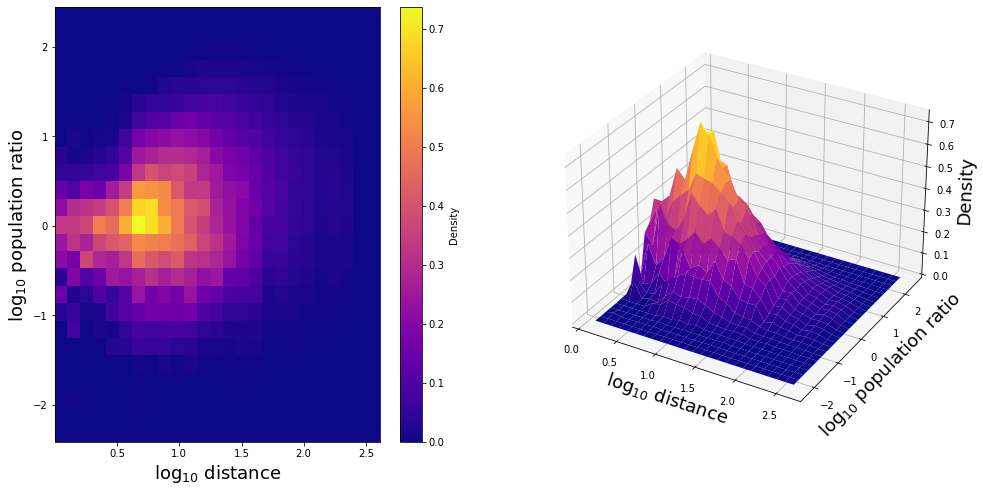

In [18]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(121)
a = ax.hist2d(log_dist, log_pop_ratio, bins = 25, density = True, cmap='plasma')
ax.set_xlabel(r'log$_{10}$ distance', size = 18)
ax.set_ylabel(r'log$_{10}$ population ratio', size = 18)
cbar = plt.colorbar(a[3], ax=ax)
cbar.set_label('Density')

ax = fig.add_subplot(122, projection='3d')
b1,b2=np.meshgrid(a[1][1:], a[2][1:], indexing='ij')
b3 = a[0].copy()

#b3[b3!=0] = np.log10(b3[b3!=0])
#b3[b3==0] = b3.min()

#fig = plt.figure(figsize=(8,8))

#ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(b1, b2, a[0], cmap='plasma')

ax.set_xlabel(r'log$_{10}$ distance', size = 18)
ax.set_ylabel(r'log$_{10}$ population ratio', size = 18)
ax.set_zlabel(r'Density', size = 18)
#plt.show()

plt.savefig("travel_density.png", dpi=600, bbox_inches="tight")


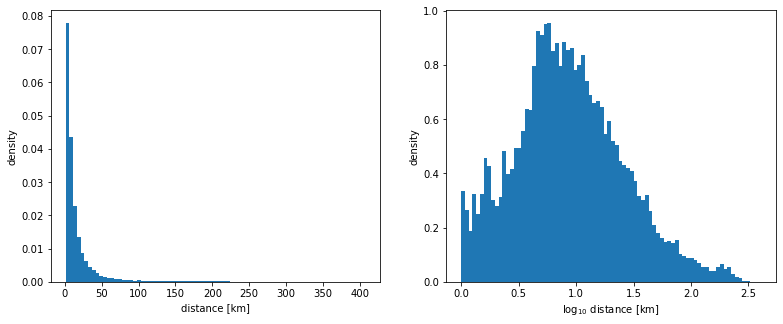

In [5]:
num_bins = 80

fig = plt.figure(figsize=(13,5))

ax = fig.add_subplot(121)
plt.hist(dist, bins = num_bins, density = True)
ax.set_ylabel('density')
ax.set_xlabel('distance [km]')

ax = fig.add_subplot(122)
plt.hist(log_dist, bins = num_bins, density = True)
ax.set_ylabel('density')
ax.set_xlabel('log$_{10}$ distance [km]')

plt.show()

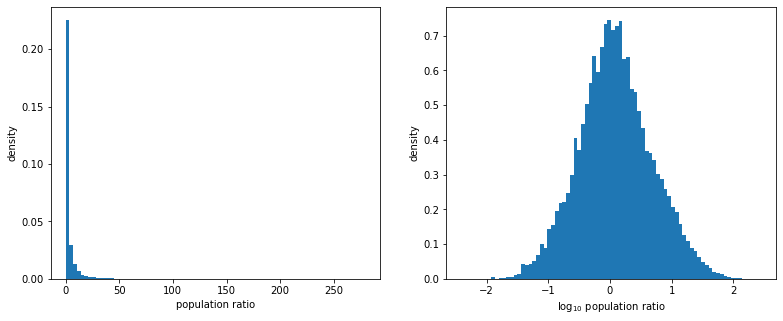

In [6]:
num_bins = 80

fig = plt.figure(figsize=(13,5))

ax = fig.add_subplot(121)
plt.hist(pop_ratio, bins = num_bins, density = True)
ax.set_ylabel('density')
ax.set_xlabel('population ratio')

ax = fig.add_subplot(122)
plt.hist(log_pop_ratio, bins = num_bins, density = True)
ax.set_ylabel('density')
ax.set_xlabel('log$_{10}$ population ratio')

plt.show()

# Kernal Density Estimation (scipy)

In [7]:
values = np.vstack([log_dist, log_pop_ratio])
kernel = stats.gaussian_kde(values)

In [8]:
X, Y = np.meshgrid(np.linspace(0, 3, 25), 
                   np.linspace(-3, 3, 25), 
                   indexing='ij')

positions = np.vstack([X.ravel(), Y.ravel()])
Z = kernel(positions)

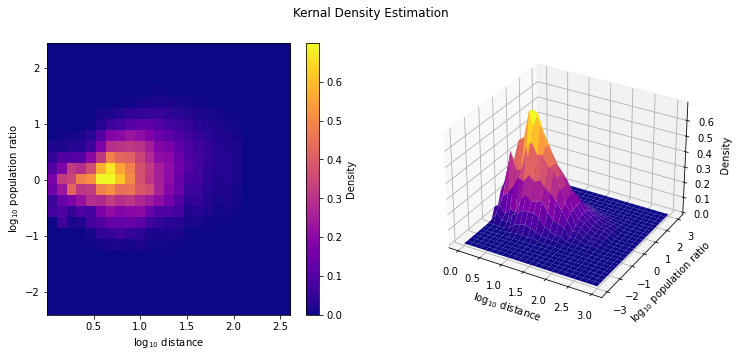

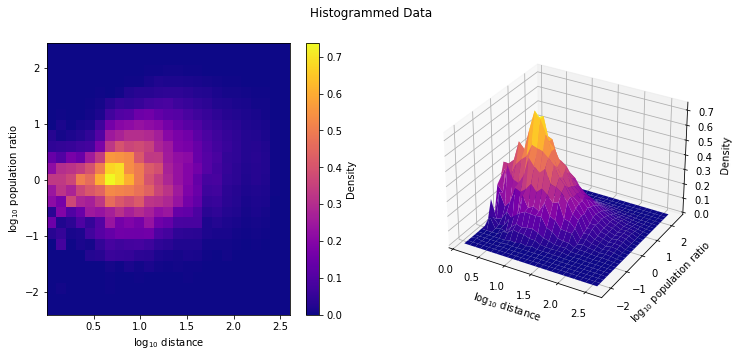

In [9]:
fig = plt.figure(figsize=(12,5))
fig.suptitle("Kernal Density Estimation")

ax = fig.add_subplot(121)
a = ax.imshow(np.rot90(np.reshape(Z, X.shape)), cmap='plasma',
          extent=[np.min(log_dist), np.max(log_dist), np.min(log_pop_ratio), np.max(log_pop_ratio)], 
             aspect = 'auto')
ax.set_xlabel(r'log$_{10}$ distance')
ax.set_ylabel(r'log$_{10}$ population ratio')
cbar = plt.colorbar(a, ax=ax)
cbar.set_label('Density')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, np.reshape(Z, X.shape), cmap='plasma')
ax.set_xlabel(r'log$_{10}$ distance')
ax.set_ylabel(r'log$_{10}$ population ratio')
ax.set_zlabel(r'Density')

fig = plt.figure(figsize=(12,5))
fig.suptitle("Histogrammed Data")
ax = fig.add_subplot(121)
a = ax.hist2d(log_dist, log_pop_ratio, bins = 25, density = True, cmap='plasma')
ax.set_xlabel(r'log$_{10}$ distance')
ax.set_ylabel(r'log$_{10}$ population ratio')
cbar = plt.colorbar(a[3], ax=ax)
cbar.set_label('Density')

ax = fig.add_subplot(122, projection='3d')
b1,b2=np.meshgrid(a[1][1:], a[2][1:], indexing='ij')
b3 = a[0].copy()

#b3[b3!=0] = np.log10(b3[b3!=0])
#b3[b3==0] = b3.min()
ax.plot_surface(b1, b2, a[0], cmap='plasma')

ax.set_xlabel(r'log$_{10}$ distance')
ax.set_ylabel(r'log$_{10}$ population ratio')
ax.set_zlabel(r'Density')
plt.show()

# Kernal Density Estimation (scikit-learn)

In [26]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
train = np.vstack([log_dist, log_pop_ratio]).T
kde.fit(train)

KernelDensity(bandwidth=0.1)

In [32]:
X, Y = np.meshgrid(np.linspace(0, 3, 40), 
                   np.linspace(-3, 3, 40), 
                   indexing='ij')

positions = np.vstack([X.ravel(), Y.ravel()]).T
Z = kde.score_samples(positions)
Z = np.exp(Z)

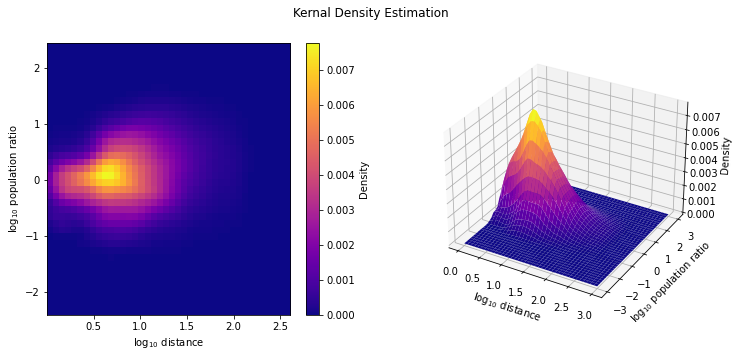

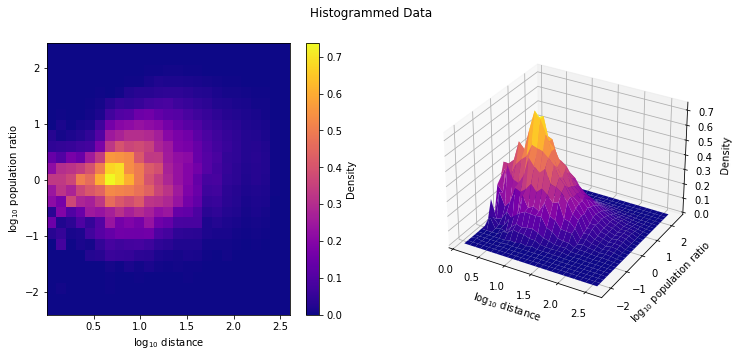

In [48]:
fig = plt.figure(figsize=(12,5))
fig.suptitle("Kernal Density Estimation")

ax = fig.add_subplot(121)
a = ax.imshow(np.rot90(np.reshape(Z, X.shape)), cmap='plasma',
          extent=[np.min(log_dist), np.max(log_dist), np.min(log_pop_ratio), np.max(log_pop_ratio)], 
             aspect = 'auto')
ax.set_xlabel(r'log$_{10}$ distance')
ax.set_ylabel(r'log$_{10}$ population ratio')
cbar = plt.colorbar(a, ax=ax)
cbar.set_label('Density')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, np.reshape(Z, X.shape), cmap='plasma')
ax.set_xlabel(r'log$_{10}$ distance')
ax.set_ylabel(r'log$_{10}$ population ratio')
ax.set_zlabel(r'Density')

fig = plt.figure(figsize=(12,5))
fig.suptitle("Histogrammed Data")
ax = fig.add_subplot(121)
a = ax.hist2d(log_dist, log_pop_ratio, bins = 25, density = True, cmap='plasma')
ax.set_xlabel(r'log$_{10}$ distance')
ax.set_ylabel(r'log$_{10}$ population ratio')
cbar = plt.colorbar(a[3], ax=ax)
cbar.set_label('Density')

ax = fig.add_subplot(122, projection='3d')
b1,b2=np.meshgrid(a[1][1:], a[2][1:], indexing='ij')
b3 = a[0].copy()

#b3[b3!=0] = np.log10(b3[b3!=0])
#b3[b3==0] = b3.min()
ax.plot_surface(b1, b2, a[0], cmap='plasma')

ax.set_xlabel(r'log$_{10}$ distance')
ax.set_ylabel(r'log$_{10}$ population ratio')
ax.set_zlabel(r'Density')
plt.show()

# Compute the random travel matrix

In [35]:
pop_ratio_mat = np.loadtxt('../data/processed/ed_soa_pop_ratio_mat.csv', delimiter=',')

In [36]:
dist_mat = np.loadtxt('../data/processed/ed_soa_dist_mat.csv', delimiter=',')

In [52]:
x, y = np.linspace(0, 3, 40),  np.linspace(-3, 3, 40)
X, Y = np.meshgrid(np.linspace(0, 3, 40), 
                   np.linspace(-3, 3, 40), 
                   indexing='ij')

In [53]:
Z = np.exp(kde.score_samples(np.vstack([X.ravel(), Y.ravel()]).T))

In [56]:
bin_area = abs((x[1]-x[0])*(y[1]-y[0]))

In [57]:
Z = Z*bin_area

In [58]:
Zr = Z.reshape(X.shape)

In [62]:
prob_mat = np.zeros_like(dist_mat)

In [63]:
for i in range(dist_mat.shape[0]):
    bx = np.digitize(np.log10(dist_mat[i]), x)
    by = np.digitize(np.log10(pop_ratio_mat[i]), y)
    prob_mat[i,:] = Zr[bx,by]*(1/np.sum(Zr[bx,by]))

<ipython-input-63-91a22ab1fc65>:2: RuntimeWarning: divide by zero encountered in log10
  bx = np.digitize(np.log10(dist_mat[i]), x)


<Figure size 1440x1440 with 0 Axes>

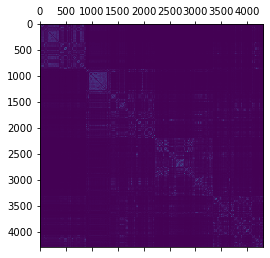

In [70]:
plt.figure(figsize=(20,20))
#ax = fig.add_subplot(111)
plt.matshow(prob_mat)
plt.show()

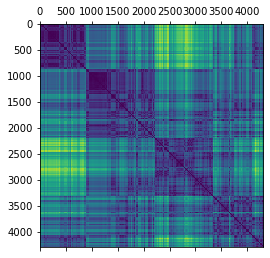

In [66]:
plt.matshow(dist_mat)

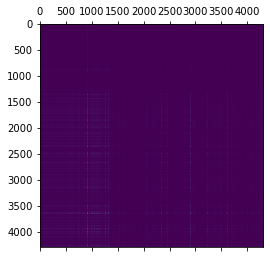

In [67]:
plt.matshow(pop_ratio_mat)